 conda install -c conda-forge keras tensorflow
#strategy

run svm as in ex4, find the best results, 
then run several tests with diffrent devision of data

spliting and choosing diffrent sets 10-20% test the rest learn, 

then try for this svm kernel some diffrent Hyper parameters

choose the best.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm

In [3]:
filename =  "C:\\Users\\owner\\Google Drive\\docs\\study\\ML_final_Project\\real_project_data.xls"

In [5]:
data = pd.read_excel(filename)
[m,n] = data.shape
print(m)
print(n)

399
21


TypeError: '_Options' object is not callable

Points on flag:
color
green    10291
red       4709
dtype: int64



Training Set Size: 10000
Test Set Size: 5000


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Confusion Matrix for SVM:
[[4320   88]
 [  29  563]]
Confusion Matrix for Logistic:


[[   0 4408]
 [   0  592]]
Confusion Matrix for Decision Tree:
[[1950 2458]
 [   0  592]]


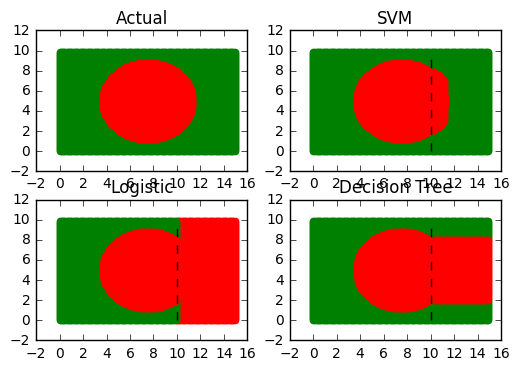

In [6]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn import svm
from sklearn import linear_model
from sklearn import tree

from sklearn.metrics import confusion_matrix

x_min, x_max = 0, 15
y_min, y_max = 0, 10
step = .1
# to plot the boundary, we're going to create a matrix of every possible point
# then label each point as a wolf or cow using our classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

df = pd.DataFrame(data={'x': xx.ravel(), 'y': yy.ravel()})

df['color_gauge'] = (df.x-7.5)**2 + (df.y-5)**2
df['color'] = df.color_gauge.apply(lambda x: "red" if x <= 15 else "green")
df['color_as_int'] = df.color.apply(lambda x: 0 if x=="red" else 1)

print "Points on flag:"
print df.groupby('color').size()
print

figure = 1

# plot a figure for the entire dataset
for color in df.color.unique():
    idx = df.color==color
    pl.subplot(2, 2, figure)
    pl.scatter(df[idx].x, df[idx].y, color=color)
    pl.title('Actual')


train_idx = df.x < 10

train = df[train_idx]
test = df[-train_idx]


print "Training Set Size: %d" % len(train)
print "Test Set Size: %d" % len(test)

# train using the x and y position coordiantes
cols = ["x", "y"]

clfs = {
    "SVM": svm.SVC(degree=0.5),
    "Logistic" : linear_model.LogisticRegression(),
    "Decision Tree": tree.DecisionTreeClassifier()
}


# racehorse different classifiers and plot the results
for clf_name, clf in clfs.iteritems():
    figure += 1

    # train the classifier
    clf.fit(train[cols], train.color_as_int)

    # get the predicted values from the test set
    test['predicted_color_as_int'] = clf.predict(test[cols])
    test['pred_color'] = test.predicted_color_as_int.apply(lambda x: "red" if x==0 else "green")
    
    # create a new subplot on the plot
    pl.subplot(2, 2, figure)
    # plot each predicted color
    for color in test.pred_color.unique():
        # plot only rows where pred_color is equal to color
        idx = test.pred_color==color
        pl.scatter(test[idx].x, test[idx].y, color=color)

    # plot the training set as well
    for color in train.color.unique():
        idx = train.color==color
        pl.scatter(train[idx].x, train[idx].y, color=color)

    # add a dotted line to show the boundary between the training and test set
    # (everything to the right of the line is in the test set)
    #this plots a vertical line
    train_line_y = np.linspace(y_min, y_max) #evenly spaced array from 0 to 10
    train_line_x = np.repeat(10, len(train_line_y)) #repeat 10 (threshold for traininset) n times
    # add a black, dotted line to the subplot
    pl.plot(train_line_x, train_line_y, 'k--', color="black")
    
    pl.title(clf_name)

    print "Confusion Matrix for %s:" % clf_name
    print confusion_matrix(test.color, test.pred_color)
pl.show()

running to fund best featurs on logistic regresstion
Best 5 features are [8, 3, 2, 19, 5] Iterations:50 alpha0.3
accuracy on test data = 0.9183673469387755%
accuracy on learning data= 0.9333333333333333%

Best 5 features are [8, 3, 2, 15, 7] Iterations:50 alpha0.3
accuracy on test data = 0.9081632653061225%
accuracy on learning data= 0.93%

Process finished with exit code 0




# split data to train and test

In [ ]:
from sklearn.cross_validation import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [ ]:
# Standardising the data.
from sklearn.preprocessing import scale
#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    
    
    
    
# Visualising distribution of data
from pandas.tools.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))

#Training and Evaluating

In [ ]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print f1, acc
    print "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc)
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print "F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc)

##broot force find parameters

In [ ]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print clf

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc)
    
f1, acc = predict_labels(clf, X_test, y_test)
print "F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc)

In [ ]:
from sklearn.preprocessing import StandardScaler
self.origin_data = self.x_mat 
normed = StandardScaler().fit_transform(self.x_mat) 
self.x_mat = normed

Before that I also used (and it worked): 
self.__features_avgs = self.data.mean(axis=0) 
# input - by column 
# self.__features_std = self.data.std(axis=0) 
# normed = (data - self.__features_avgs) / self.__features_std